# Exploratory Data Analysis

### Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in the CSV
df = pd.read_csv("Clean_2015_Pitching_Data.csv", sep = ",")

### Understand the Data

In [3]:
# Display the Head
df.head()

,NAME,ID,last_year,player_age,last_year_Yahoo,IP,pa,ab,hit,single,...,offspeed_avg_break,offspeed_range_speed,new_yahoo,new_IP,new_win,new_loss,new_hit,new_earned_run,new_walk,new_strikeout
0,"Alcantara, Sandy",645261,2022,26,576.6,228.2,886,820,174,120,...,17.3,1.3,284.6,184.2,7,12,176,85,48,151
1,"Anderson, Tyler",542881,2022,32,441.6,178.2,707,657,145,94,...,16.2,1.4,162.0,141.0,6,6,146,85,64,119
2,"Bassitt, Chris",605135,2022,33,394.6,181.2,745,680,159,113,...,17.9,2.2,431.0,200.0,16,8,176,80,59,186
3,"Berrios, Jose",621244,2022,28,246.0,172.0,753,692,199,135,...,15.4,1.7,367.6,189.2,11,12,173,77,52,184
4,"Bieber, Shane",669456,2022,27,487.0,200.0,791,747,172,123,...,14.8,1.2,225.0,128.0,6,6,124,54,34,107


In [4]:
# Display the Tail
df.tail()

,NAME,ID,last_year,player_age,last_year_Yahoo,IP,pa,ab,hit,single,...,offspeed_avg_break,offspeed_range_speed,new_yahoo,new_IP,new_win,new_loss,new_hit,new_earned_run,new_walk,new_strikeout
410,"Verlander, Justin",434378,2015,32,252.3,133.1,535,493,113,78,...,19.1,1.4,588.6,227.2,16,9,171,77,57,254
411,"Volquez, Edinson",450172,2015,31,355.3,200.1,850,758,190,134,...,13.2,1.6,182.3,189.1,10,11,217,113,76,139
412,"Wacha, Michael",608379,2015,23,390.3,181.1,762,687,162,109,...,14.9,1.7,168.0,138.0,7,7,159,78,45,114
413,"Walker, Taijuan",592836,2015,22,305.6,169.2,705,648,163,107,...,13.5,1.6,214.3,134.1,8,11,129,63,37,119
414,"Weaver, Jered",450308,2015,32,182.0,159.0,669,617,163,97,...,17.9,1.6,177.0,178.0,12,12,209,100,51,103


In [5]:
# Display the number of columns and rows
df.shape

(415, 106)

In [6]:
# Change the data type of last_year and ID to string
df['ID'] = df['ID'].astype(str)
df['last_year'] = df['last_year'].astype(str)

### Cleaning the Data

In [7]:
# Checking for null values
df.isnull().sum()

NAME               0
ID                 0
last_year          0
player_age         0
last_year_Yahoo    0
                  ..
new_loss           0
new_hit            0
new_earned_run     0
new_walk           0
new_strikeout      0
Length: 106, dtype: int64

In [8]:
# Eliminate String Variables + All Target Features other than Strikeouts
data = df.drop(['ID', 'last_year', 'NAME', 'new_yahoo', 'new_IP', 'new_win', 'new_loss', 'new_hit', 'new_earned_run', 'new_walk'], axis=1)
data.head()

,player_age,last_year_Yahoo,IP,pa,ab,hit,single,double,triple,home_run,...,breaking_avg_break_x,breaking_avg_break,breaking_range_speed,n_offspeed_formatted,offspeed_avg_speed,offspeed_avg_spin,offspeed_avg_break_x,offspeed_avg_break,offspeed_range_speed,new_strikeout
0,26,576.6,228.2,886,820,174,120,32,6,16,...,0.4,4.2,1.8,27.6,91.8,2056,-16.8,17.3,1.3,151
1,32,441.6,178.2,707,657,145,94,31,6,14,...,-2.0,8.7,1.7,31.6,79.0,1848,13.3,16.2,1.4,119
2,33,394.6,181.2,745,680,159,113,26,1,19,...,13.8,16.6,5.4,6.1,85.4,1824,-16.2,17.9,2.2,186
3,28,246.0,172.0,753,692,199,135,34,1,29,...,15.8,16.5,1.5,15.4,84.6,1522,-14.4,15.4,1.7,184
4,27,487.0,200.0,791,747,172,123,29,2,18,...,5.5,8.5,2.0,2.3,86.4,1557,-12.9,14.8,1.2,107


#### *Correlation Analysis*
Goal - Narrow the scope of features by only including features with absolute correlation >= 0.5

In [9]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Select the target variable column
target_variable = "new_strikeout" 

# Get correlations with the target variable
target_correlations = correlation_matrix[target_variable].abs()
high_corr_features = target_correlations[target_correlations >= 0.5].index

# Print the correlations
print("Features with absolute correlation >= 0.5 with", target_variable)
print(high_corr_features)

Features with absolute correlation >= 0.5 with new_strikeout
Index(['strikeout', 'k_percent', 'p_swinging_strike', 'xba',
       'z_swing_miss_percent', 'iz_contact_percent', 'in_zone_swing_miss',
       'whiff_percent', 'new_strikeout'],
      dtype='object')


In [10]:
# Create strikeout df with just the wanted features
strikeout = data[['new_strikeout', 'strikeout', 'k_percent', 'p_swinging_strike', 'xba', 'z_swing_miss_percent', 'iz_contact_percent', 'in_zone_swing_miss', 'whiff_percent']]
strikeout.head()

,new_strikeout,strikeout,k_percent,p_swinging_strike,xba,z_swing_miss_percent,iz_contact_percent,in_zone_swing_miss,whiff_percent
0,151,207,23.4,388,0.215,18.3,80.8,218,25.4
1,119,138,19.5,288,0.225,17.5,82.1,161,24.2
2,186,167,22.4,283,0.227,19.6,80.1,195,23.6
3,184,149,19.8,231,0.275,12.8,86.8,114,21.2
4,107,198,25.0,351,0.245,15.8,83.9,154,29.7


### Relationship Analysis

In [11]:
# Display basic statistics for each numerical column
pd.set_option('display.precision', 2)
strikeout.describe()

,new_strikeout,strikeout,k_percent,p_swinging_strike,xba,z_swing_miss_percent,iz_contact_percent,in_zone_swing_miss,whiff_percent
count,415.00,415.00,415.00,415.00,415.00,415.00,415.00,415.00,415.00
mean,161.47,160.20,22.74,268.04,0.24,16.71,82.53,149.84,24.15
std,46.49,43.18,4.79,75.41,0.02,3.61,3.52,48.64,4.22
min,56.00,56.00,10.40,116.00,0.17,6.60,72.60,55.00,12.60
25%,128.00,128.50,19.60,213.50,0.23,14.40,80.30,116.50,21.30
50%,154.00,154.00,22.00,259.00,0.24,16.60,82.50,144.00,23.60
75%,190.50,184.00,25.70,309.00,0.26,18.90,84.95,177.00,26.90
max,326.00,308.00,38.40,546.00,0.31,27.20,91.80,342.00,36.50


Text(0.5, 1.0, 'Prior Year Statistics Correlating with New Year Strikeouts')

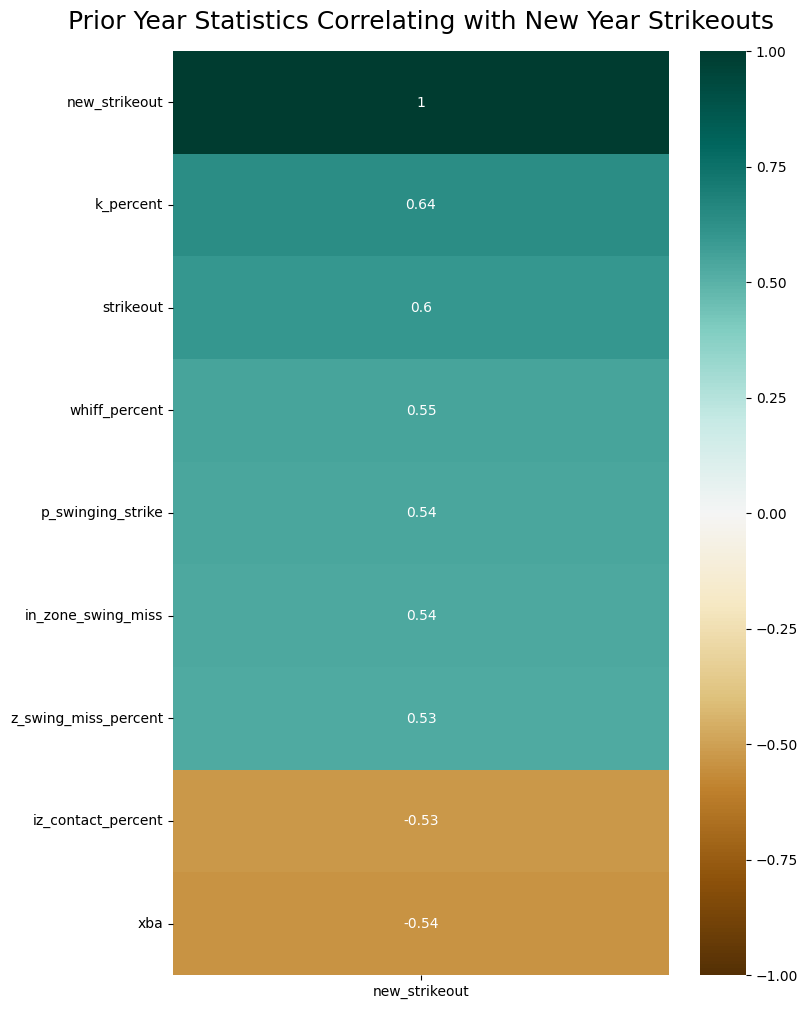

In [12]:
# Plotting Correlation HeatMap
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(strikeout.corr()[['new_strikeout']].sort_values(by='new_strikeout', ascending=False), vmin=-1, vmax=1, 
                      annot=True, cmap='BrBG')
heatmap.set_title('Prior Year Statistics Correlating with New Year Strikeouts', fontdict={'fontsize':18}, pad=16)

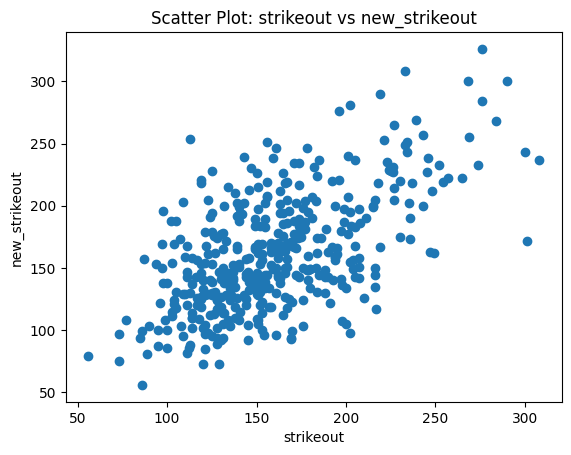

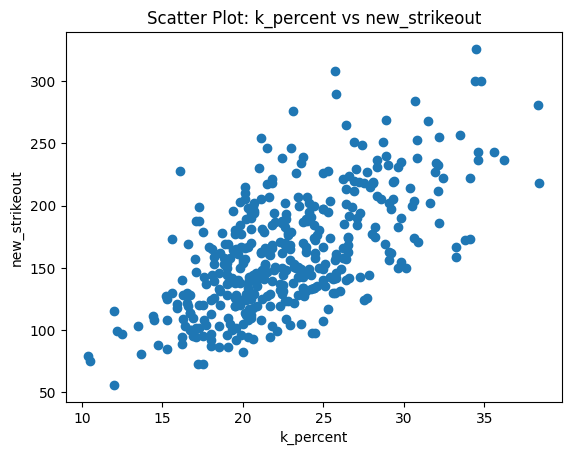

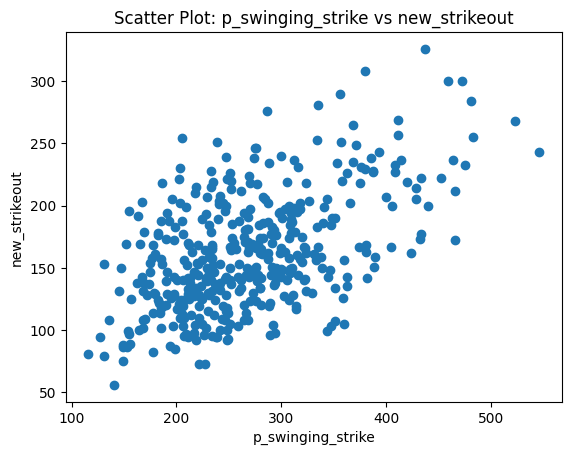

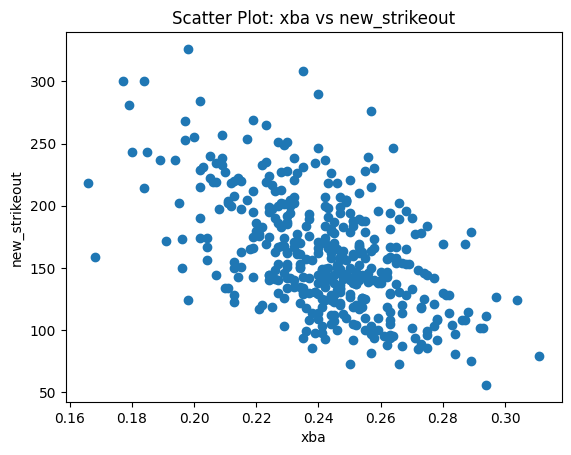

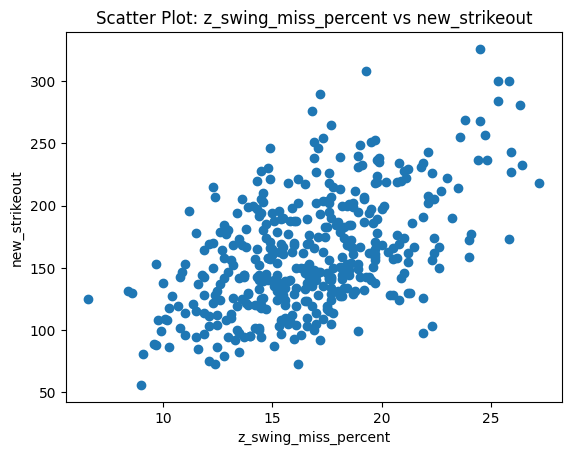

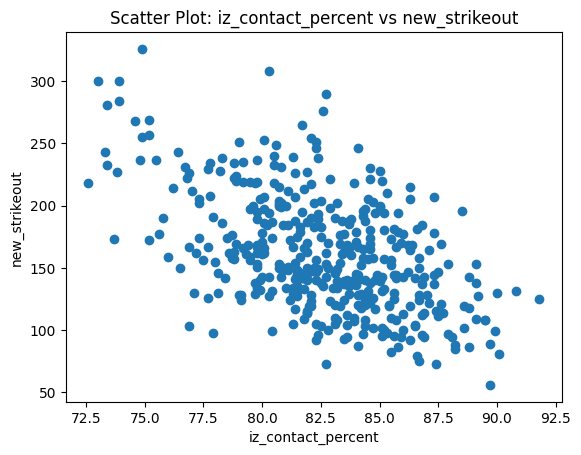

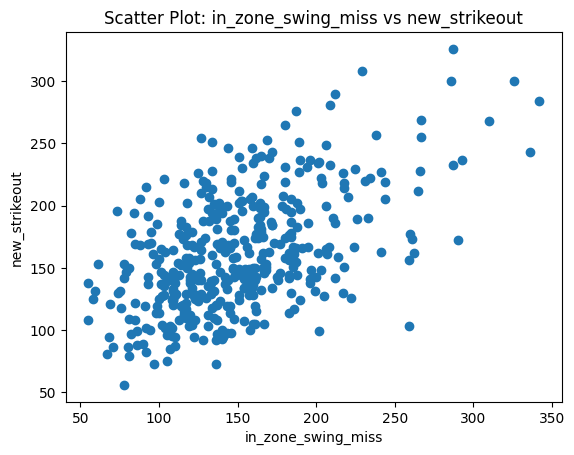

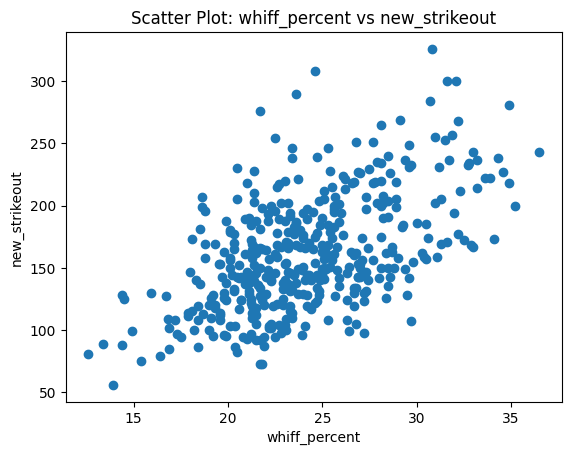

In [13]:
# Iterate through all features except the target
for feature in strikeout.columns:
  if feature != target_variable:
    plt.figure()  # Create a new figure for each scatter plot
    plt.scatter(strikeout[feature], strikeout[target_variable])
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.title(f"Scatter Plot: {feature} vs {target_variable}")
    plt.show()